# Variable Importance Extraction from Random Forest Regression Model

The model is from the model_training notebook. This simply loads in the model and begins exploring variable importance and how that can be used to help users improve their profiles.

## Library Imports

In [12]:
# Model Importing
import pickle
import os

# Feature Importance Extraction and Plotting
import numpy as np
import matplotlib.pyplot as plt



## Importing Model

In [11]:
# Loading serialized model from pickle
filename = os.environ['PWD'] + "/scripts/finalized_model.sav"
model = pickle.load(open(filename, 'rb'))

## Feature Importance

Reference:
    - https://scikit-learn.org/stable/auto_examples/ensemble/plot_forest_importances.html
    
Findings:
    - The bio features are the most important and are followed by a state, number of skills, skill categories

In [22]:
# Extraction
importances = model.feature_importances_
std = np.std([tree.feature_importances_ for tree in model.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]
n_features = model.n_features_

# Print Feature rankings
print("Feature ranking:")

# Top 10 features
for f in range(10):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

Feature ranking:
1. feature 1 (0.112454)
2. feature 3 (0.111467)
3. feature 2 (0.103397)
4. feature 4 (0.094540)
5. feature 36 (0.061841)
6. feature 0 (0.054033)
7. feature 57 (0.041951)
8. feature 59 (0.036633)
9. feature 23 (0.029893)
10. feature 63 (0.029205)


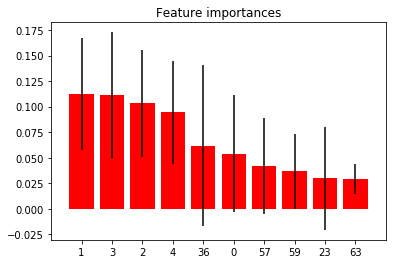

In [29]:
# Plot the impurity-based feature importances of the forest (Top 10 Features)
plt.figure()
plt.title("Feature importances")
plt.bar(range(10), importances[indices][0:10],
        color="r", yerr=std[indices][0:10], align="center")
plt.xticks(range(10), indices[0:10])
plt.xlim([-1, 10])
plt.show()